# Classification Part 2

## K-Nearest Neighbours (k-NN): A first example

k-NN is a non-parametric and lazy learning algorithm. Non-parametric means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset. This will be very helpful in practice where most of the real world datasets do not follow mathematical theoretical assumptions.
Lazy algorithm means it does not need any training data points for model generation. All training data used in the testing phase. This makes training faster and testing phase slower and costlier. Costly testing phase means time and memory. In the worst case, KNN needs more time to scan all data points and scanning all data points will require more memory for storing training data.

Choosing to play outside is dependent on weather conditions and temperature. In this example, the objective is to link two features (weather and temperature) to the possibility to play outside or not.

In [125]:
import pandas as pd
pd.set_option("display.max_rows", 16)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Assigning features and label variables
# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

### KNeighborsClassifier module from sklearn

`KNeighborsClassifier()` is a Python class that allows you to classify using the k-nearest neighbors method. It has some options `sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)`:
- *n_neighbors*. The k number, the number of neighbors to use by default for k-neighbors queries.
- *weights* Can be ‘uniform’, ‘distance’ or callable. If uniform, no weight is applied on data. If distance, it weights points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Callable means a custom function provided by the user.
- *algorithm* Can be ‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’. It is the algorithm used to compute the nearest neighbors: BallTree and KDTree are algorithm that create a structure (Tree) in the data so that the predictions are made faster, brute is simply computing every distance for every predictions.
- *leaf_size* Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.
- *p* - Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used. On the picture, manhattan distance is in blue, red and yellow and euclidian distance is in green.

![Manhattan distance](https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Manhattan_distance.svg/480px-Manhattan_distance.svg.png)

- *metric* the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
- *metric_params* - Leave it as is.
- *n_jobs* Number of threads used when parallelizing over classes if multi_class=’ovr’”. This parameter is ignored when the solver is set to ‘liblinear’ regardless of whether ‘multi_class’ is specified or not. None means 1 and -1 means using all processors.

**Warning** : Regarding the Nearest Neighbors algorithms, if it is found that two neighbors, neighbor k+1 and k, have identical distances but different labels, the results will depend on the ordering of the training data.

In [126]:
kNN = KNeighborsClassifier(n_neighbors=4)
kNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

### KNeighborsClassifier methods and attributes

The KNeighborsClassifier() class has access to the similar methods/attributes as all other Scikit learn algorithms:
- *.fit()* trains the model and computes the coefficient and intercept values
- *.predict()* allows to predict a value from the model
- *predict_proba(X)* Probability of X being in one class
- *score(X, y)* Return the mean accuracy on the given test data and labels.

Additionnaly, you get access to the following functions:
- *kneighbors(X, n_neighbors, return_distance)* Finds the K-neighbors of a point.
- *kneighbors_graph(X, n_neighbors, mode)* Computes the (weighted) graph of k-Neighbors for points in X

### Encoding data

Various machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column.

In order to encode this data, you could map each value to a number. e.g. Overcast:0, Rainy:1, and Sunny:2.

This process is known as label encoding, and sklearn conveniently will do this for you using `LabelEncoder()`.
This algorithm is taught to encode target labels with value between 0 and n_classes-1.
It is not always a good thing to encore input data as your classification algorithms might have some clever strategies using patterns in the real data to classify it. Here, there is no such relationship and it kNN only allows to compute number relationships.

`LabelEncoder()` methods/attributes:

- *fit(y)* Fit label encoder.
- *transform(y)* Transform labels to normalized encoding.
- *fit_transform(y)* Fit label encoder and return encoded labels.
- *inverse_transform(y)* Transform labels back to original encoding.
- *classes_* Holds the label for each class.

In [127]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
leW = preprocessing.LabelEncoder() #Weather
leT = preprocessing.LabelEncoder() #Temperature
leP = preprocessing.LabelEncoder() #Play

# Converting string labels into numbers.
leW.fit(weather)
list(leW.classes_)
weather_encoded=leW.transform(weather)

In [128]:
list(leW.classes_)

['Overcast', 'Rainy', 'Sunny']

The different data are now known by `le` and it can now convert data using `transform`. In this case, you might want to use `fit_transform` as this will be one line faster.

In [129]:
# Converting string labels into numbers.
weather_encoded=leW.fit_transform(weather)
weather_encoded

array([2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1], dtype=int64)

In [130]:
# converting string labels into numbers
temp_encoded=leT.fit_transform(temp)
list(leT.classes_)

['Cool', 'Hot', 'Mild']

In [131]:
label=leP.fit_transform(play)
list(leP.classes_)
label

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [132]:
#combinig weather and temp into single listof tuples
features=list(zip(weather_encoded,temp_encoded))
features

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

### Predicting one value using kNN

Let's predict if one should play outside when the weather is overcast and temperature is mild based on previous data.

In [133]:
# Train the model using the training sets
kNN.fit(features,label)

#Predict Output
predicted= kNN.predict([[0,1]]) # 0:Overcast, 2:Mild
leP.inverse_transform(predicted)

array(['Yes'], dtype='<U3')

### Plotting the data

To plot the data, a list of all possible combination is made, this will be sent to the kNN algorithm to have all possibilities classified/predicted which will allow to make a graph. Graph will go grom red, which stands for No to Blue

In [134]:
x_min, x_max = 0, 3
y_min, y_max = 0, 3
xx, yy = np.meshgrid(np.arange(x_min, x_max),
                         np.arange(y_min, y_max))
AllComb=np.c_[xx.ravel(), yy.ravel()]
AllComb

array([[0, 0],
       [1, 0],
       [2, 0],
       [0, 1],
       [1, 1],
       [2, 1],
       [0, 2],
       [1, 2],
       [2, 2]])

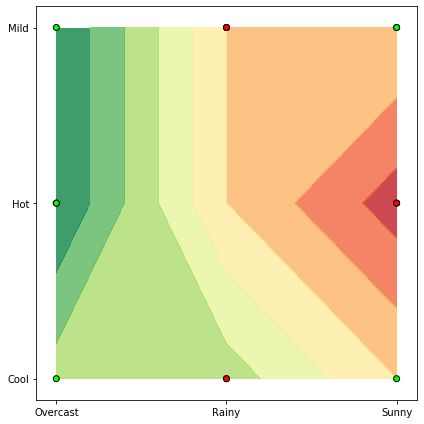

In [135]:
from matplotlib.colors import ListedColormap

#Colomaps
cm_bright = ListedColormap(['#FF0000', '#00FF00']) #The two color red and blue
cm = plt.cm.RdYlGn #A colormap that goes from red to blue

#Data
predicted_AllComb= kNN.predict(AllComb)
predicted_proba_AllComb= kNN.predict_proba(AllComb)[:, 1]
Z = predicted_proba_AllComb.reshape(xx.shape)

#Figure construction
figure = plt.figure(figsize=(6, 6))
ax = plt.subplot(1,1,1)
ax.contourf(xx, yy , Z , cmap=cm, alpha=.8)
ax.scatter(weather_encoded, temp_encoded, c=label, cmap=cm_bright,
               edgecolors='k')
plt.tight_layout()
plt.xticks([0, 1, 2])
ax.set_xticklabels(leW.classes_)
plt.yticks([0, 1, 2])
ax.set_yticklabels(leT.classes_)
plt.show()


### A correction to that model

This model is actually very bad, weather and temperature inputs are not sorted. Things should go from Cool to Hot and from Rainy to Sunny.

Let's reorder that manually.

In [136]:
weather_Corrected = [0 if x == 'Rainy' else 1 if x == 'Overcast' else 2 for x in weather]
weather_Corrected

[2, 2, 1, 0, 0, 0, 1, 2, 2, 0, 2, 1, 1, 0]

In [137]:
temp_Corrected = [0 if x == 'Cool' else 1 if x == 'Mild' else 2 for x in temp]
features_2=list(zip(weather_Corrected,temp_Corrected))
features_2

[(2, 2),
 (2, 2),
 (1, 2),
 (0, 1),
 (0, 0),
 (0, 0),
 (1, 0),
 (2, 1),
 (2, 0),
 (0, 1),
 (2, 1),
 (1, 1),
 (1, 2),
 (0, 1)]

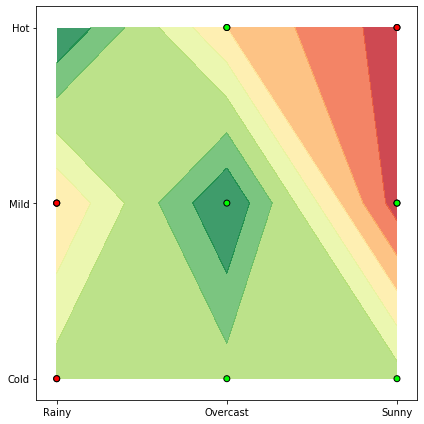

In [138]:
# Train the model using the training sets
kNN.fit(features_2,label)

x_min, x_max = 0, 3
y_min, y_max = 0, 3
xx, yy = np.meshgrid(np.arange(x_min, x_max),
                         np.arange(y_min, y_max))
AllComb=np.c_[xx.ravel(), yy.ravel()]
#Data
predicted_AllComb= kNN.predict(AllComb)
predicted_proba_AllComb= kNN.predict_proba(AllComb)[:, 1]
Z = predicted_proba_AllComb.reshape(xx.shape)

#Figure construction
figure = plt.figure(figsize=(6, 6))
ax = plt.subplot(1,1,1)
ax.contourf(xx, yy , Z , cmap=cm, alpha=.8)
ax.scatter(weather_Corrected, temp_Corrected, c=label, cmap=cm_bright,
               edgecolors='k')
plt.tight_layout()
plt.xticks([0, 1, 2])
ax.set_xticklabels(['Rainy','Overcast','Sunny'])
plt.yticks([0, 1, 2])
ax.set_yticklabels(['Cold','Mild','Hot'])
plt.show()

## A second example : Zalando's Image dataset

Zalando is a German e-commerce company specializing in the sale of shoes and clothing. Created in 2008 by Rocket Internet, it is present in 17 European countries.
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

This dataset comes from : https://github.com/zalandoresearch/fashion-mnist

This exercise objective is to classify images according to the article they represent with the K nearest neighbour method. The loading process is very long so be careful not to re run it many times.

### Loading dataset

In [139]:
from Fashion_MNIST_Loader.mnist_loader import MNIST

#loading dataset

data = MNIST('./Fashion_MNIST_Loader/dataset/')

img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)

# img_test, labels_test = data.load_testing()
# test_img = np.array(img_test)
# test_labels = np.array(labels_test)

Train image shape: (60000, 784)
Train label shape: (60000,)
28 x 28: 784


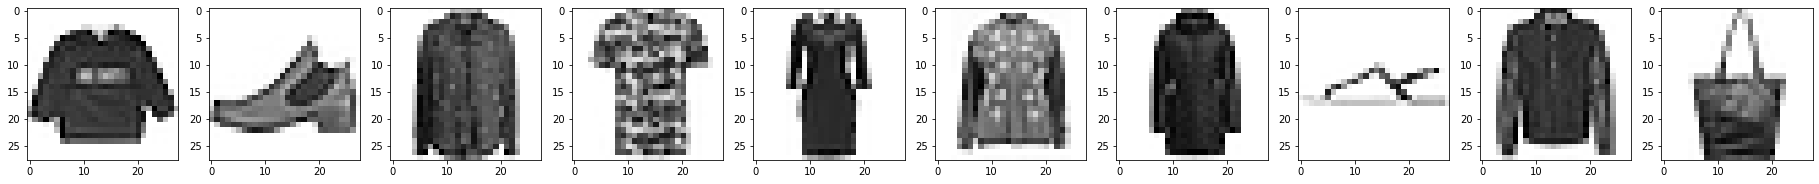

In [140]:
print("Train image shape: "+str(train_img.shape))
print("Train label shape: "+str(train_labels.shape))
# print("Test image shape: "+str(test_img.shape))
# print("Test label shape: "+str(test_labels.shape))
print("28 x 28: "+str(28*28))

def display(img):
    Img=img.reshape((28, 28)).astype(np.uint8)
    plt.imshow(Img, interpolation='nearest',cmap='Greys')
    

fig=plt.figure(figsize=(32,18))
for i in range(0,10):
    ax=plt.subplot(1, 10, i+1)
    display(train_img[i])

### Training the model

Because the training set is already very big, it is reduced and transformed into a smaller training and a testing set.

If you want, you can later improve the size of the dataset.

In [141]:
from sklearn.model_selection import train_test_split

img_train, img_test, label_train, label_test =train_test_split(train_img, train_labels, train_size=.15 , test_size=.05, random_state=2)

In [142]:
print("Train image shape: "+str(img_train.shape))
print("Train label shape: "+str(label_train.shape))
print("Test image shape: "+str(img_test.shape))
print("Test label shape: "+str(label_test.shape))
print("28 x 28: "+str(28*28))

Train image shape: (9000, 784)
Train label shape: (9000,)
Test image shape: (3000, 784)
Test label shape: (3000,)
28 x 28: 784


Creation of the classifier and training with the training set

In [143]:
clf_Zalando = KNeighborsClassifier(n_neighbors=5,algorithm='auto',n_jobs=6)
clf_Zalando.fit(img_train,label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=6, n_neighbors=5, p=2,
                     weights='uniform')

### Predict values and checking the accuracy

This part here can be very long depending on your computer. Remember that we are trying to get the closest images from the training test and that each image requires a long processing.

*accuracy_score* returns the accuracy classification score. It is similar to classifier.score() but you provide the test and predicted values, while classifier.score does the prediction for you.

In [144]:
# Calculating Accuracy of trained Classifier
confidence = clf_Zalando.score(img_test,label_test)

# Making Predictions on Validation Data
test_pred = clf_Zalando.predict(img_test)

Computing scores from metrics.

In [145]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculating Accuracy of Predictions
accuracy = accuracy_score(label_test, test_pred)

# Creating Confusion Matrix
conf_mat = confusion_matrix(label_test,test_pred)

print('\nKNN Trained Classifier Confidence: ',confidence)
print('\nPredicted Values: ',test_pred.shape)
print('\nAccuracy of Classifier on Validation Image Data: ',accuracy)


KNN Trained Classifier Confidence:  0.815

Predicted Values:  (3000,)

Accuracy of Classifier on Validation Image Data:  0.815


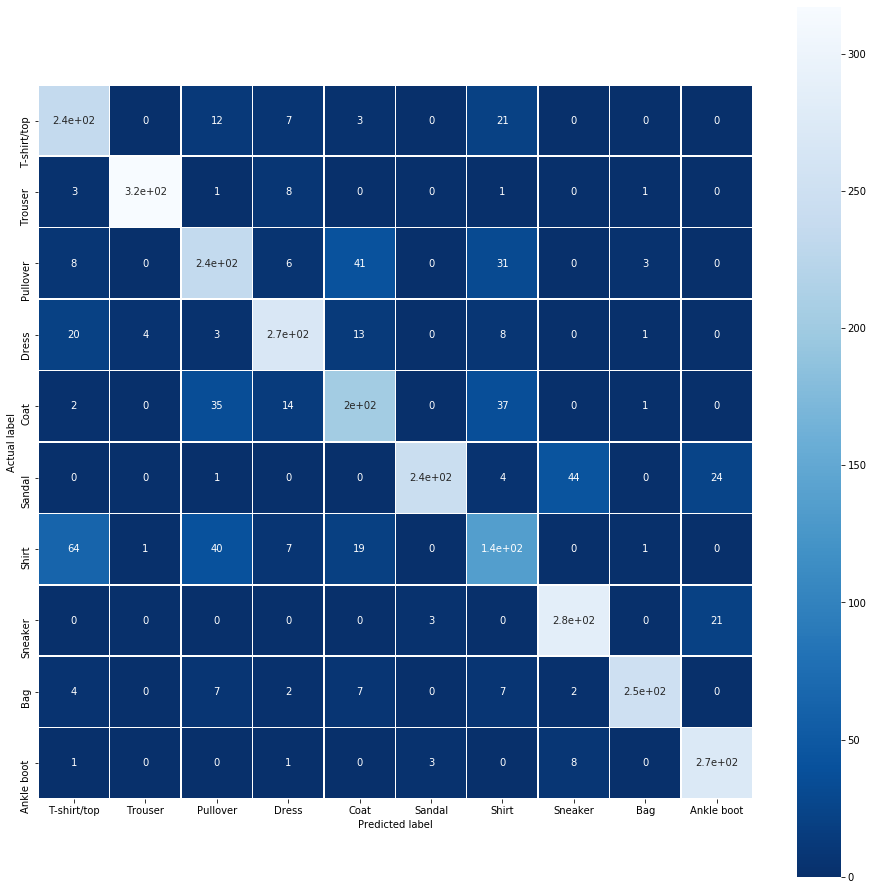

In [146]:
import seaborn as sns

conf_mat=pd.DataFrame(conf_mat)
conf_mat.columns = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
conf_mat.index = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plt.figure(figsize=(16,16))
sns.heatmap(conf_mat, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.show()

### Displaying the results

Display of some random images from the test dataset, showing the original and predicted label.

Rerun the block to get other examples.

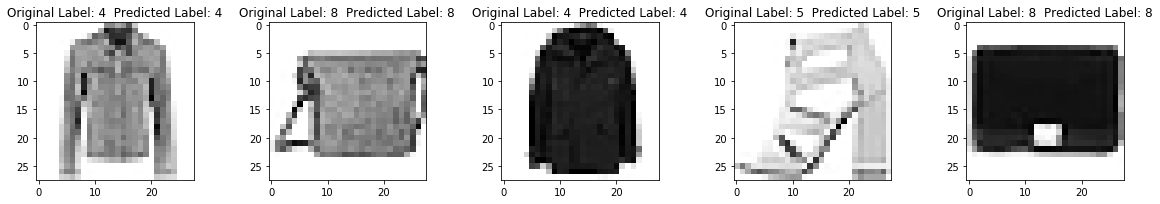

In [147]:
def display_test(i):
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(label_test[i],test_pred[i]))
    Img=img_test[i].reshape((28, 28)).astype(np.uint8)
    plt.imshow(Img, interpolation='nearest',cmap='Greys')

# Show random Test Images with Original and Predicted Labels
a = np.random.randint(1,label_test.shape[0],5)
fig=plt.figure(figsize=(32,18))
for i in range(0,5):
    ax=plt.subplot(1, 10, i+1)
    display_test(a[i])

    
fig.tight_layout()
plt.show()

### Conclusion

K Nearest Neighboor performs poorly when the general shape of the image are similar. It is not good to catch some particular details and has difficulties to make a difference between Shirt / T-Shirt / Pullover for instance.

## Decision Tree : predicting NBA next match winners

The National Basketball Association (NBA) is the major men’s professional basketball league in North America and is widely considered to be the premier men’s professional basketball league in the world. It has 30 teams (29 in the United States and 1 in Canada). The data is available at https://www.basketball-reference.com/leagues/NBA_2021_games.html.

The objective of this decision tree is to determine which team will win next match according to previous results.

The first step is to load the dataset.

In [148]:
#Loading data
df = pd.read_csv("NBA_2020.csv",parse_dates=["Date"])
df.columns = ["Date","Time","Visitor Team","Visitor Points","Home Team","Home Points","Score Type","Extra Time","Visitor Count","Notes"]
del df["Extra Time"]
del df["Notes"]
del df["Visitor Count"]
del df["Score Type"]
df

,Date,Time,Visitor Team,Visitor Points,Home Team,Home Points
0,2020-12-22,7:00p,Golden State Warriors,99,Brooklyn Nets,125
1,2020-12-22,10:00p,Los Angeles Clippers,116,Los Angeles Lakers,109
2,2020-12-23,7:00p,Charlotte Hornets,114,Cleveland Cavaliers,121
3,2020-12-23,7:00p,New York Knicks,107,Indiana Pacers,121
4,2020-12-23,7:00p,Miami Heat,107,Orlando Magic,113
...,...,...,...,...,...,...
528,2021-03-04,8:00p,Milwaukee Bucks,112,Memphis Grizzlies,111
529,2021-03-04,8:30p,Miami Heat,103,New Orleans Pelicans,93
530,2021-03-04,9:00p,Oklahoma City Thunder,107,San Antonio Spurs,102
531,2021-03-04,10:00p,Golden State Warriors,98,Phoenix Suns,120


### Creating features

Let's create labels and features with which the decision tree classifier can predict.

Following features will be added to the dataset for classification:
- *Home Team wins* Wether the home team wins the game: 1 if the home team wins and 0 if the visitor team wins. This will be the label, the thing that we want to predict.
- *Home Last Win* and *Visitor Last Win* Whether either of the visitor or home team won their last game when it was played at the home team.
- *Home Win Streak* and *Visitor Win Streak* Wether the teams are on a win streak against each other.
- *Home Team Rank Higher* Which team is considered better generally? Based on previous year data we compare their rank
- *Home Team Won Last* Which team won their last encounter team regardless of playing at home

In [149]:
df["Home Team Win"] = df["Visitor Points"] < df["Home Points"]
print("Home Team Win percentage: {0:.1f}%".format(100 * df["Home Team Win"].sum() / df["Home Team Win"].count()))

Home Team Win percentage: 53.5%


We will help the algorithm by adding information on the previous ladder ranking. Using data from the previous year's ladder from [2019 Ladder ranking](https://www.basketball-reference.com/leagues/NBA_2019_standings.html).

In [150]:
standing_df = pd.read_csv("2019_Standings.csv")
standing=standing_df[["Rk","Team"]]
standing

,Rk,Team
0,1,Milwaukee Bucks
1,2,Toronto Raptors
2,3,Golden State Warriors
3,4,Denver Nuggets
4,5,Houston Rockets
...,...,...
25,26,Atlanta Hawks
26,27,Chicago Bulls
27,28,Cleveland Cavaliers
28,29,Phoenix Suns


In [151]:
df["Home Last Win"] = False
df["Visitor Last Win"] = False
from collections import defaultdict
won_last = defaultdict(int)
for index, row in df.iterrows():
    home_team = row["Home Team"]
    visitor_team = row["Visitor Team"]
    row["Home Last Win"] = won_last[home_team]
    row["Visitor Last Win"] = won_last[visitor_team]
    df.loc[index] = row
    #We then set our dictionary with the each team's result (from this row) for the next
    #time we see these teams.
    #Set current Win
    won_last[home_team] = row["Home Team Win"]
    won_last[visitor_team] = not row["Home Team Win"]

In [152]:
#Which team won their last encounter

df["Home Win Streak"] = 0
df["Visitor Win Streak"] = 0
win_streak = defaultdict(int)

for index, row in df.iterrows():
    home_team = row["Home Team"]
    visitor_team = row["Visitor Team"]
    row["Home Win Streak"] = win_streak[home_team]
    row["Visitor Win Streak"] = win_streak[visitor_team]
    df.loc[index] = row    
    # Set current win
    if row["Home Team Win"]:
        win_streak[home_team] += 1
        win_streak[visitor_team] = 0
    else:
        win_streak[home_team] = 0
        win_streak[visitor_team] += 1

In [153]:
# The standing of the team
df["Home Team Ranks Higher"] = 0
for index , row in df.iterrows():
    home_team = row["Home Team"]
    visitor_team = row["Visitor Team"]
    home_rank = standing[standing["Team"] == home_team]["Rk"].values[0]
    visitor_rank = standing[standing["Team"] == visitor_team]["Rk"].values[0]
    row["Home Team Rank Higher"] = int(home_rank > visitor_rank)
    df.loc[index] = row

In [154]:
# Which team won their last encounter team regardless of playing at home
last_match_winner = defaultdict(int)
df["Home Team Won Last"] = 0
for index , row in df.iterrows():
    home_team = row["Home Team"]
    visitor_team = row["Visitor Team"]
    teams = tuple(sorted([home_team, visitor_team]))
    
    row["Home Team Won Last"] = 1 if last_match_winner[teams] == row["Home Team"] else 0
    df.loc[index] = row
    # Who won this one?
    winner = row["Home Team"] if row["Home Team Win"] else row["Visitor Team"]
    last_match_winner[teams] = winner
    
df

,Date,Time,Visitor Team,Visitor Points,Home Team,Home Points,Home Team Win,Home Last Win,Visitor Last Win,Home Win Streak,Visitor Win Streak,Home Team Ranks Higher,Home Team Won Last
0,2020-12-22,7:00p,Golden State Warriors,99,Brooklyn Nets,125,True,0,0,0,0,0,0
1,2020-12-22,10:00p,Los Angeles Clippers,116,Los Angeles Lakers,109,False,0,0,0,0,0,0
2,2020-12-23,7:00p,Charlotte Hornets,114,Cleveland Cavaliers,121,True,0,0,0,0,0,0
3,2020-12-23,7:00p,New York Knicks,107,Indiana Pacers,121,True,0,0,0,0,0,0
4,2020-12-23,7:00p,Miami Heat,107,Orlando Magic,113,True,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,2021-03-04,8:00p,Milwaukee Bucks,112,Memphis Grizzlies,111,False,True,False,2,0,0,0
529,2021-03-04,8:30p,Miami Heat,103,New Orleans Pelicans,93,False,False,False,0,0,0,0
530,2021-03-04,9:00p,Oklahoma City Thunder,107,San Antonio Spurs,102,False,True,False,1,0,0,0
531,2021-03-04,10:00p,Golden State Warriors,98,Phoenix Suns,120,True,True,False,3,0,0,1


### DecisionTreeClassifier module from sklearn

`DecisionTreeClassifier()` is a Python class that allows you to classify using the k-nearest neighbors method. It has some options `DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)`:
- *criterion* The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain..
- *splitter* The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
- *max_depth* The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- *min_samples_split* The minimum number of samples required to split an internal node. If it is an int, then consider min_samples_split as the minimum number. If it is a float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
- *min_samples_leaf* - The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
- *min_weight_fraction_leaf* Leave it as is
- *max_features* leave it as is
- *random_state* Controls the randomness of the estimator. Give a number to get same results.
- *max_leaf_nodes* Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
- *min_impurity_decrease* A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
- *min_impurity_split* Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
- *class_weight* Leave it as is
- *ccp_alpha* Leave it as is

In [155]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=14)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=14, splitter='best')

### Evaluating the classification using cross_val_score

`cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan`allows to get a score by cross-validation using a certain classification method and a training set.
It has the following most commonly used options:
- *estimator* The object to use to fit the data. Here this will be our `DecisionTreeClassifier()`
- *X* and *y* the dataset
- *scoring* A function name with signature scorer(estimator, X, y) which should return only a single value.

In [156]:
df

,Date,Time,Visitor Team,Visitor Points,Home Team,Home Points,Home Team Win,Home Last Win,Visitor Last Win,Home Win Streak,Visitor Win Streak,Home Team Ranks Higher,Home Team Won Last
0,2020-12-22,7:00p,Golden State Warriors,99,Brooklyn Nets,125,True,0,0,0,0,0,0
1,2020-12-22,10:00p,Los Angeles Clippers,116,Los Angeles Lakers,109,False,0,0,0,0,0,0
2,2020-12-23,7:00p,Charlotte Hornets,114,Cleveland Cavaliers,121,True,0,0,0,0,0,0
3,2020-12-23,7:00p,New York Knicks,107,Indiana Pacers,121,True,0,0,0,0,0,0
4,2020-12-23,7:00p,Miami Heat,107,Orlando Magic,113,True,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,2021-03-04,8:00p,Milwaukee Bucks,112,Memphis Grizzlies,111,False,True,False,2,0,0,0
529,2021-03-04,8:30p,Miami Heat,103,New Orleans Pelicans,93,False,False,False,0,0,0,0
530,2021-03-04,9:00p,Oklahoma City Thunder,107,San Antonio Spurs,102,False,True,False,1,0,0,0
531,2021-03-04,10:00p,Golden State Warriors,98,Phoenix Suns,120,True,True,False,3,0,0,1


In [157]:
from sklearn.model_selection import cross_val_score

y_train = df["Home Team Win"].values
X_train = df[['Home Win Streak', 'Visitor Win Streak', 'Home Team Ranks Higher',
       'Home Team Won Last', 'Home Last Win', 'Visitor Last Win']].values

scores = cross_val_score(clf, X_train, y_train, scoring='accuracy')
print(scores)
print("Using just the last result from the home and visitor teams")
print("Accuracy: {0:.1f}%".format(np.mean(scores) * 100))
df["Home Team Win"].value_counts()

[0.48598131 0.51401869 0.51401869 0.59433962 0.55660377]
Using just the last result from the home and visitor teams
Accuracy: 53.3%


True     285
False    248
Name: Home Team Win, dtype: int64

In [158]:
X_train

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, True, False],
       [3, 0, 0, 1, True, False],
       [2, 1, 0, 1, True, True]], dtype=object)

Have a look at the tree built and let's explain how it can be read:
- At every block, the first line is the "question"/criteria that discriminates the most.
- Gini is the impurity coefficient for that criteria
- Samples is the amount of data available at that point of the tree (the sample that was used to make this rule)
- Values is the repartition of the result, here there are two possibilities and for the first block you have 248 home team wins and 285 home team loses. (If there would be more than 2 options this list would give an amount of values available for each option)
- Class gives the majority class at that point: this is the answer your algorithm would give if it stops at that point of the tree.

The two next block are generated as follow: the one on the right represent the ones for which the criteria is true, the one on the left represent the ones for which the criteria is false.

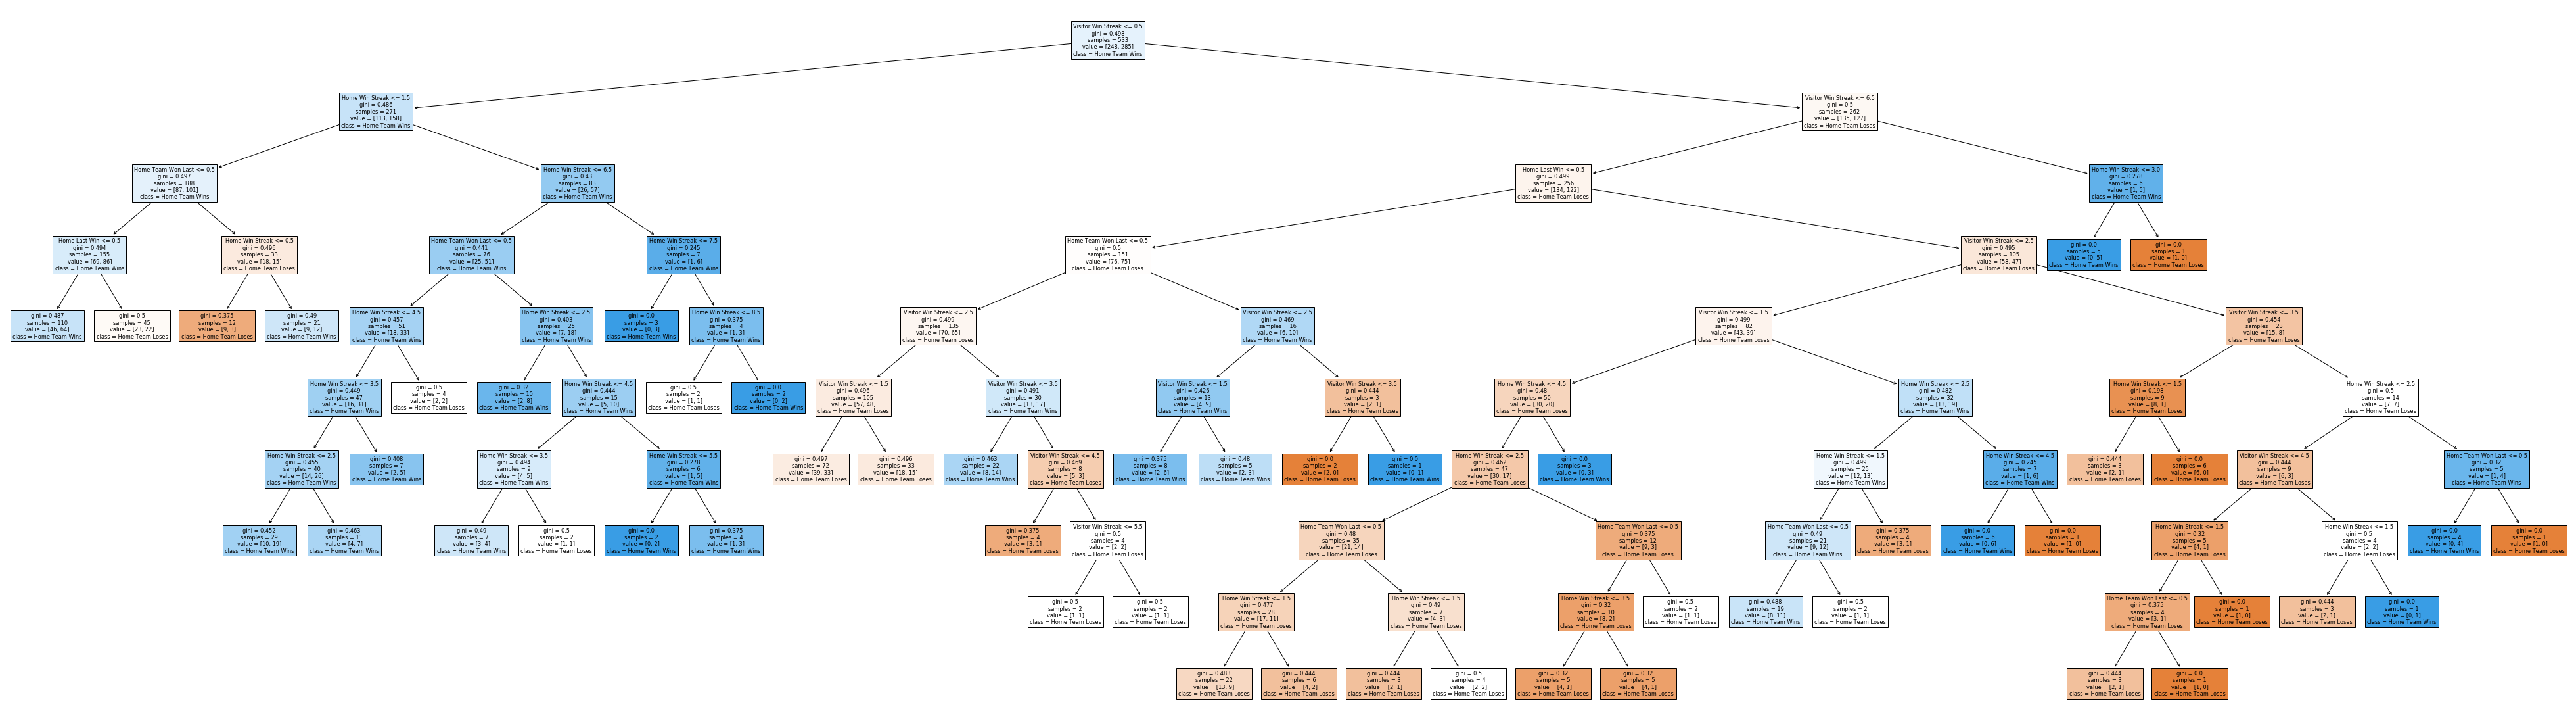

In [159]:
clf.fit(X_train, y_train)

feat_names= ['Home Win Streak', 'Visitor Win Streak', 'Home Team Ranks Higher',
       'Home Team Won Last', 'Home Last Win', 'Visitor Last Win']
cl_names=['Home Team Loses','Home Team Wins']
#Displaying the decision tree
from sklearn import tree
plt.figure(figsize=(70,20))
tree.plot_tree(clf, feature_names=feat_names, class_names=cl_names, filled=True)

plt.show()

### Obtain a team related classification tree

The previous result is not really handy, as it does not or use information about the team playing and requires to collect all data from each team at each new game you want to predict.
Therefore, the teams will be included as parameter inside the dataset.

A OneHotEncoder will be used to have all teams taken into account. This encodes categorical features as a one-hot numeric array.
One hot encoding takes the number of elements, creates a number containing 0 and 1 and gives a unique 1 for each elements. Here is an example with three fruits (Apple, Banana and Orange):

| Fruit | Code | 
| --- | --- |
| Apple | 100 | 
| Banana | 010 | 
| Orange | 001 | 

The main advantage of this encoding is that to switch from one state to another, only two transitions are necessary: one digit goes from 1 to 0, another from 0 to 1.

The disadvantage is the size of the variable in memory since it uses as many bits as there are states.

In [160]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoding = LabelEncoder()
#We will fit this transformer to the home teams so that it learns an integer
#representation for each team
encoding.fit(df["Home Team"].values)

home_teams = encoding.transform(df["Home Team"].values)
visitor_teams = encoding.transform(df["Visitor Team"].values)
X_teams = np.vstack([home_teams, visitor_teams]).T
X_teams

array([[ 2,  9],
       [13, 12],
       [ 5,  3],
       ...,
       [26, 20],
       [23,  9],
       [24, 25]])

In [164]:
#we use the OneHotEncoder transformer to encode 

onehot = OneHotEncoder()
#We fit and transform 
X_teams_2 = onehot.fit_transform(X_teams).todense()
print(X_teams_2.shape)
X_teams_2

(533, 60)


matrix([[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Having now the playing teams, we add this information to the input features/dataset

In [163]:
X_all = np.hstack([X_train, X_teams_2])
print(X_all.shape)
#Print one random line from the dataset
X_all[350]

(533, 66)


matrix([[0, 4, 0, 0, False, True, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
         0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
         0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],
       dtype=object)

In [166]:
df

,Date,Time,Visitor Team,Visitor Points,Home Team,Home Points,Home Team Win,Home Last Win,Visitor Last Win,Home Win Streak,Visitor Win Streak,Home Team Ranks Higher,Home Team Won Last
0,2020-12-22,7:00p,Golden State Warriors,99,Brooklyn Nets,125,True,0,0,0,0,0,0
1,2020-12-22,10:00p,Los Angeles Clippers,116,Los Angeles Lakers,109,False,0,0,0,0,0,0
2,2020-12-23,7:00p,Charlotte Hornets,114,Cleveland Cavaliers,121,True,0,0,0,0,0,0
3,2020-12-23,7:00p,New York Knicks,107,Indiana Pacers,121,True,0,0,0,0,0,0
4,2020-12-23,7:00p,Miami Heat,107,Orlando Magic,113,True,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,2021-03-04,8:00p,Milwaukee Bucks,112,Memphis Grizzlies,111,False,True,False,2,0,0,0
529,2021-03-04,8:30p,Miami Heat,103,New Orleans Pelicans,93,False,False,False,0,0,0,0
530,2021-03-04,9:00p,Oklahoma City Thunder,107,San Antonio Spurs,102,False,True,False,1,0,0,0
531,2021-03-04,10:00p,Golden State Warriors,98,Phoenix Suns,120,True,True,False,3,0,0,1


In [165]:
#we run the decision tree on the new dataset
clf = DecisionTreeClassifier(random_state=14)
scores = cross_val_score(clf, X_all, y_train, scoring='accuracy')
print("Accuracy: {0:.1f}%".format(np.mean(scores) * 100))

Accuracy: 54.8%


In [167]:
#Getting the list of features for the display

list(encoding.inverse_transform(list(np.arange(0,30))))
feat_names = ['Home Win Streak', 'Visitor Win Streak', 'Home Team Ranks Higher',
       'Home Team Won Last', 'Home Last Win', 'Visitor Last Win']
Team_encoded_list=list(encoding.inverse_transform(list(np.arange(0,30))))
feat_names.extend([s + " as home" for s in Team_encoded_list])
feat_names.extend([s + " as visitor" for s in Team_encoded_list])

The obtained tree is very deep. Try to modify max_depth.

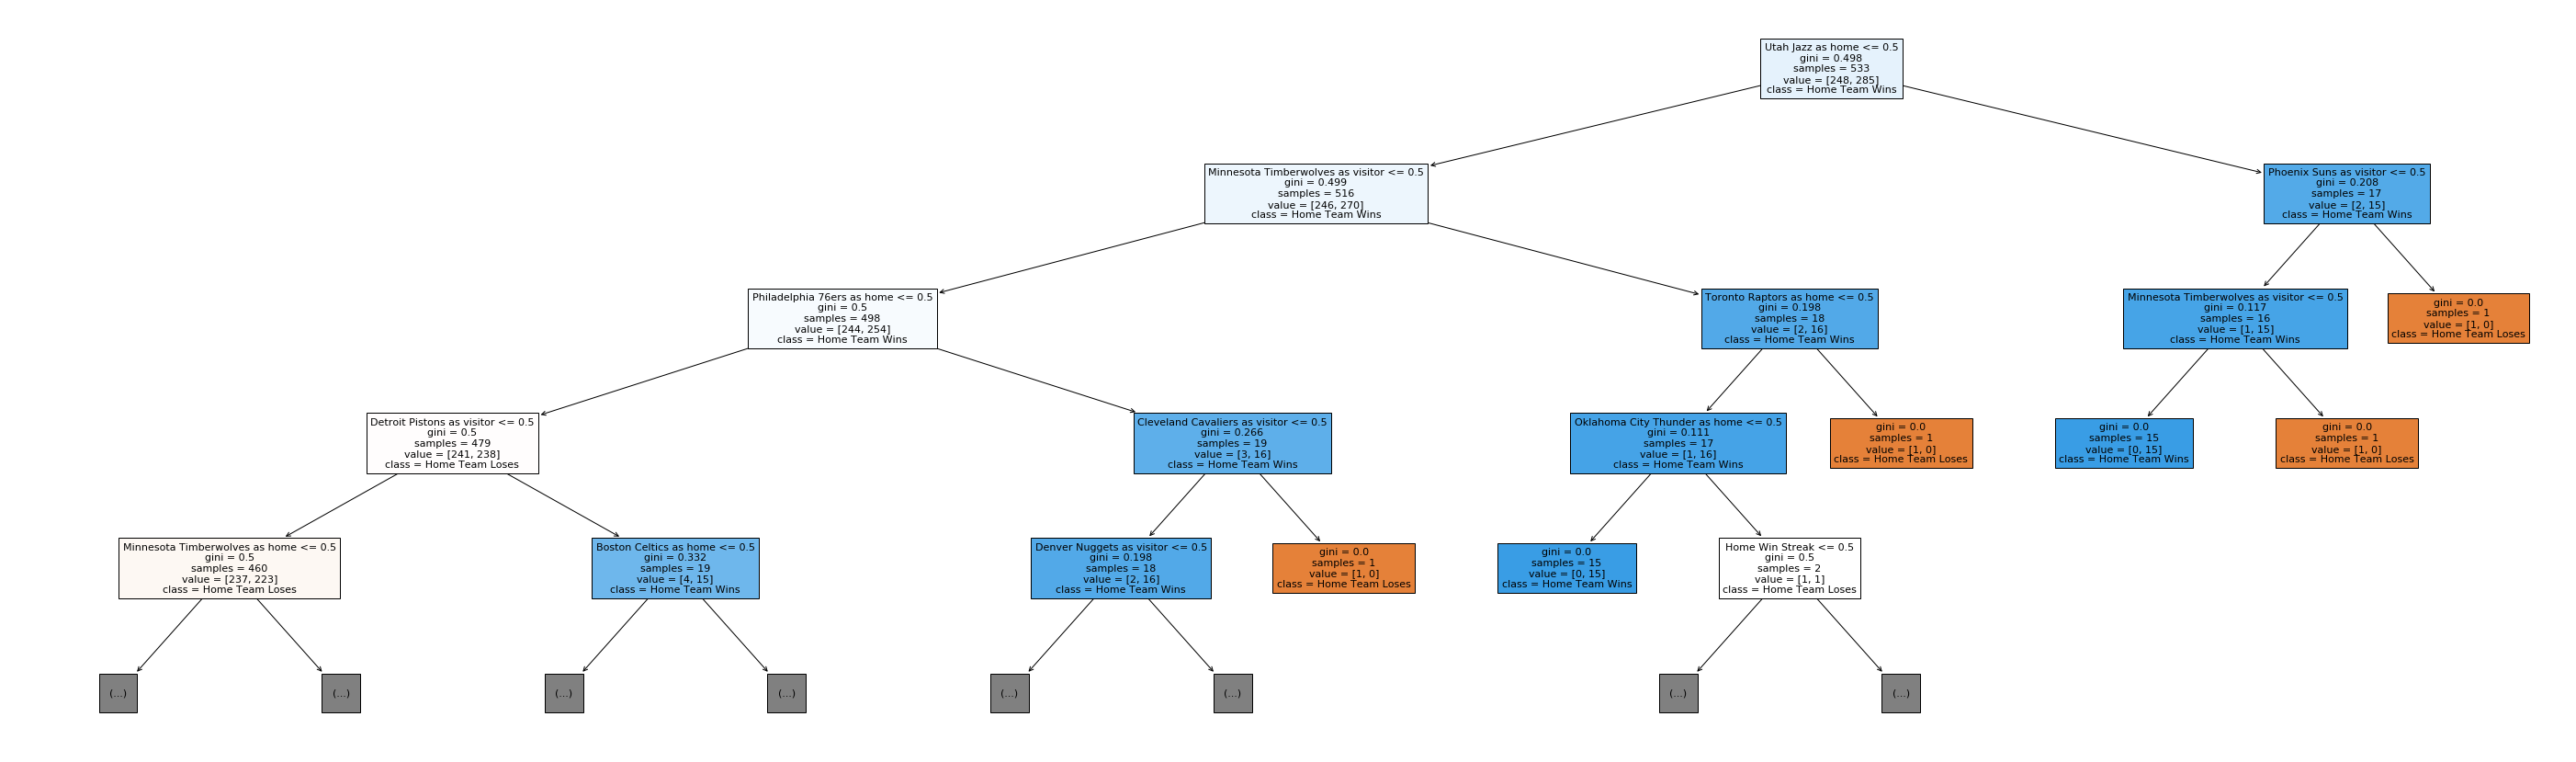

In [170]:
clf.fit(X_all, y_train)

#Displaying the decision tree
from sklearn import tree
plt.figure(figsize=(50,15))
tree.plot_tree(clf, max_depth=4, feature_names=feat_names, class_names=cl_names, filled=True)

plt.show()

### Simplify the classification tree

Very often, data is over fitted and the decision tree is likely to perform poorly by not adequately generalizing to new data.
Notably, while decision trees such as this one are easy to interpret, it’s also important to recognize that small changes in the data or decisions that we make about the modeling approach lead to very different splits.

Let's make a much smaller decision tree by selecting only two data: 'Home Team Ranks Higher' and 'Home Win Streak'.

In [176]:
from sklearn.model_selection import train_test_split
import sklearn.metrics

X_small = df[['Home Team Ranks Higher', 'Home Win Streak']]
y_train = df["Home Team Win"].values
pred_train, pred_test, tar_train, tar_test  =   train_test_split(X_small, y_train, test_size=.35, random_state=2)

#Build model on training data
classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[26, 55],
       [31, 75]], dtype=int64)

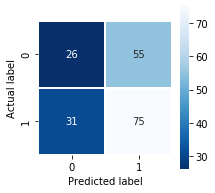

In [172]:
import seaborn as sns

plt.figure(figsize=(3,3))
sns.heatmap(sklearn.metrics.confusion_matrix(tar_test,predictions), annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.show();

Accuracy is very low. 50% is equivalent to a coin flip.

In [177]:
print("Accuracy: {0:.1f}%".format(sklearn.metrics.accuracy_score(tar_test, predictions) * 100))

Accuracy: 54.0%


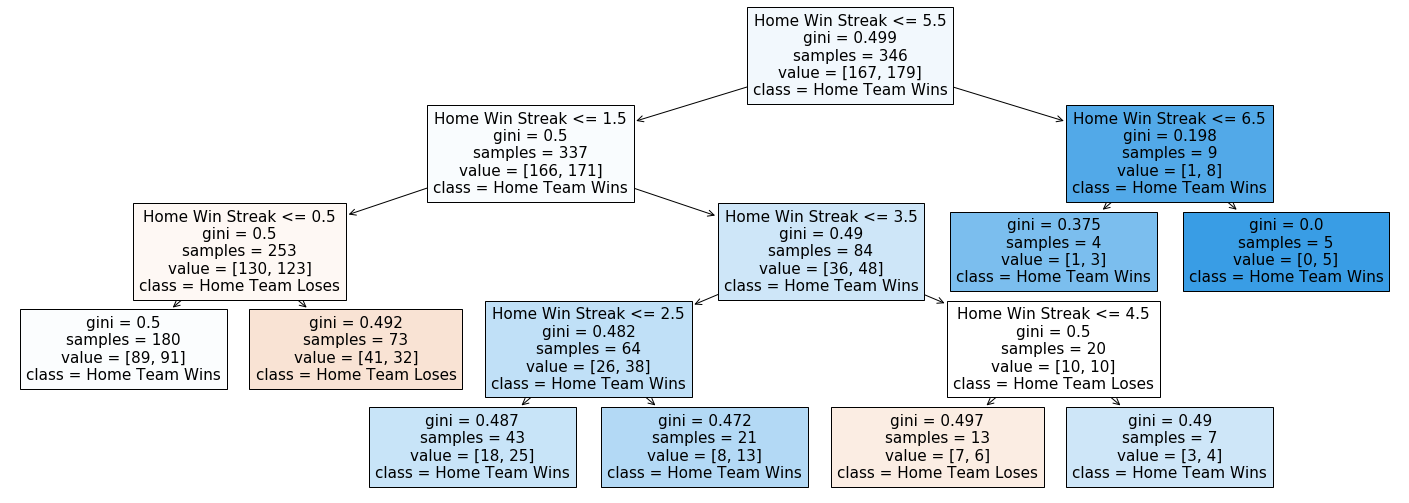

In [178]:
feat_names=['Home Team Ranks Higher', 'Home Win Streak']

#Displaying the decision tree
from sklearn import tree
plt.figure(figsize=(25,9))
tree.plot_tree(classifier, feature_names=feat_names, class_names=cl_names, filled=True)

plt.show()

Fun fact: 5 out of 5 home teams that had more than 7 games win streak at home did win their match.

### Conclusion

It is very hard to predict the outcome of NBA matches. Actually, with the features used here there is no way to predict the outcome of a game.

## Decision Tree: Iris dataset

In this example we will go through the iris dataset from scikit learn. This dataset is built-in and already prepared for our use.

In this dataset there are three sub-species from iris : setosa, versicolor and virginica.
The goal is to classify them based on their sepal dimensions (length and width) and petal dimensions (length and width).

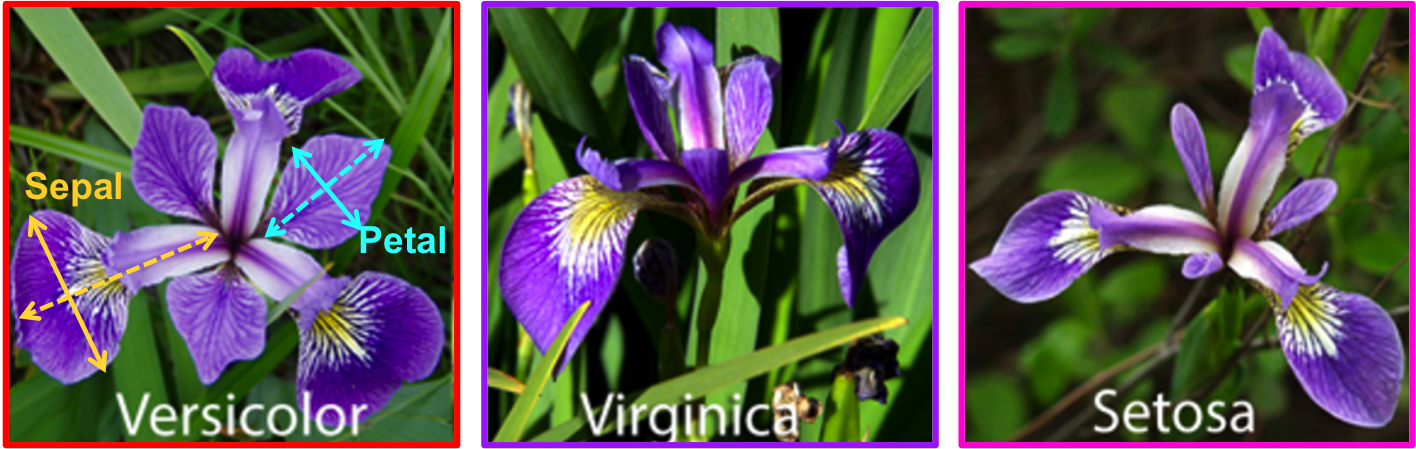

In [183]:
from sklearn import datasets

# Loading data
iris = datasets.load_iris()
X = iris.data
y = iris.target

iris_train, iris_test, iris_target_train,  iris_target_test  =   train_test_split(X, y, test_size=.35, random_state=2)

In [184]:
# Fit the classifier with default hyper-parameters
iris_clf = DecisionTreeClassifier(random_state=1234)
model = iris_clf.fit(iris_train, iris_target_train)

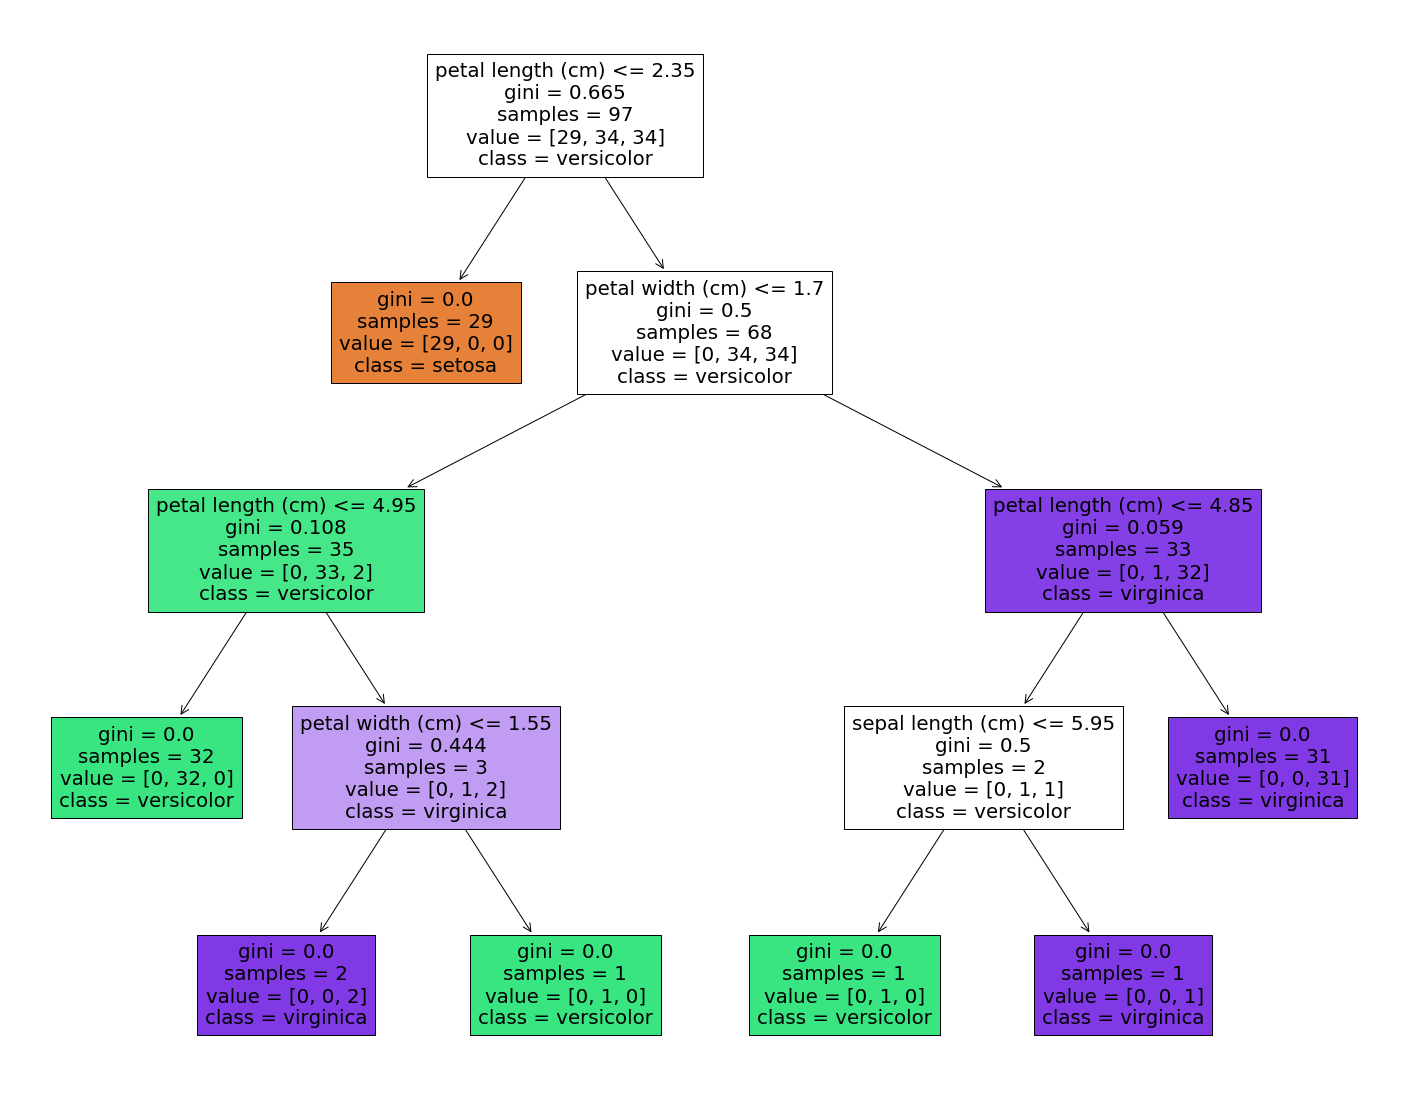

In [185]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(iris_clf, feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)
plt.show()

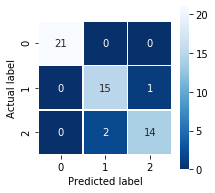

Accuracy: 94.3%


In [186]:
## Predictions
iris_target_predictions=iris_clf.predict(iris_test)

plt.figure(figsize=(3,3))
sns.heatmap(sklearn.metrics.confusion_matrix(iris_target_test,iris_target_predictions), annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.show();

print("Accuracy: {0:.1f}%".format(sklearn.metrics.accuracy_score(iris_target_test, iris_target_predictions) * 100))

### Conclusion

The iris decision tree is way more accurate than the nba decision tree.

## Classifier comparison

A comparison of a several classifiers in scikit-learn on synthetic datasets. The point of this example is to illustrate the nature of decision boundaries of different classifiers. This should be taken with a grain of salt/does not always holds true, as the intuition conveyed by these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated linearly and the simplicity of classifiers such as naive Bayes and linear SVMs might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points semi-transparent. The lower right shows the classification accuracy on the test set.

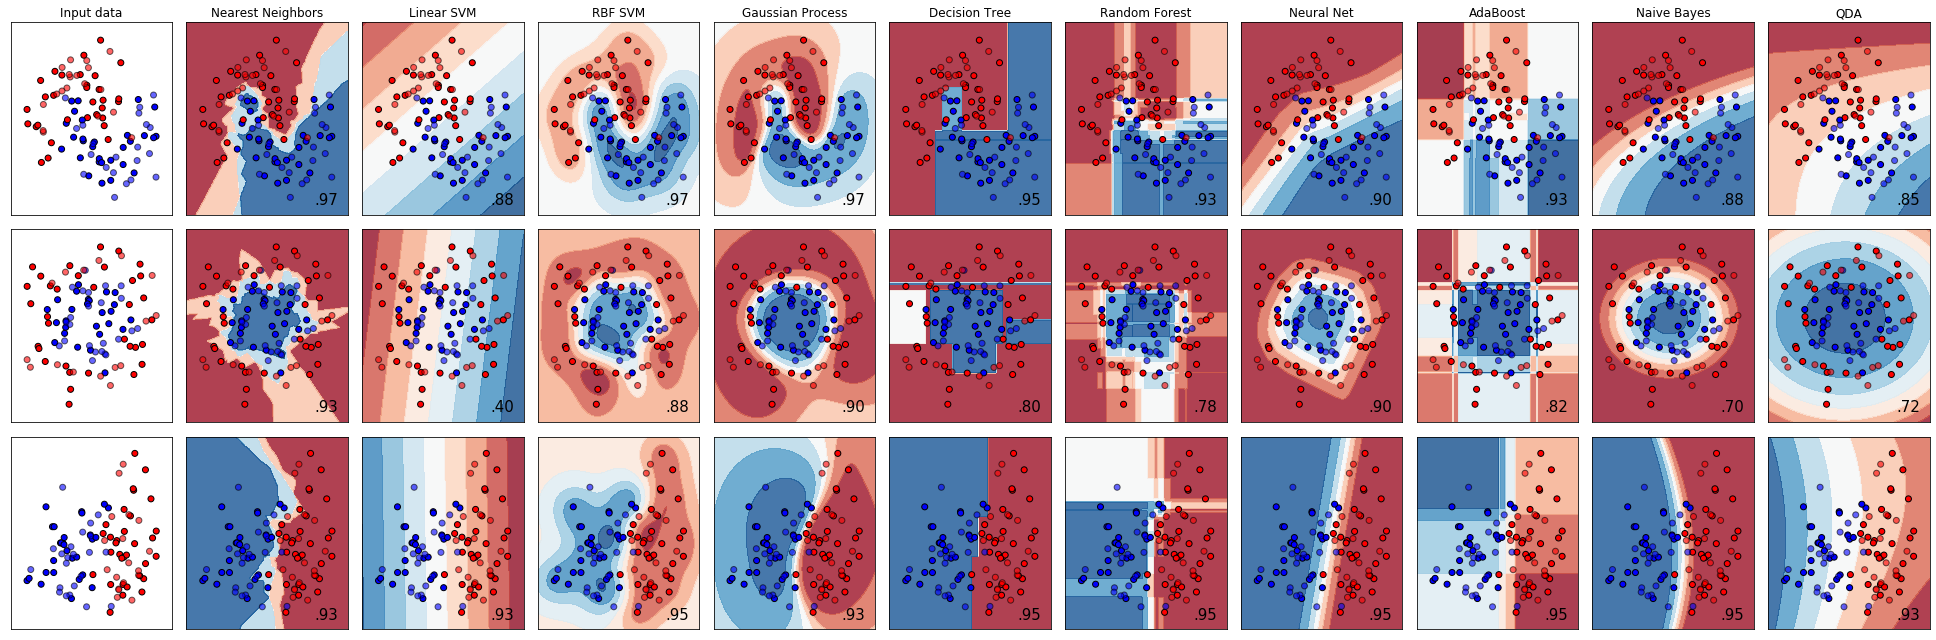

In [187]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()